Problem Statement:
Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all irrespective of any status. You are required to analyze this health and medical data for better future preparation.

Do ETL: Extract- Transform and Load data from the heart disease diagnostic database

In [14]:
#Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [15]:
#Extracting CSV Dataset using Pandas Library

heart_data=pd.read_csv("Downloads\\Heart_Disease_data.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
#All Columns in the Dataset

heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Each of the column description:
age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [6]:
#Checking  for NULL Values

heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Since all the null values are 0 , null values are not present

In [17]:
# Percentage of people having heart disease

perc=heart_data.groupby('target').size()
perc

target
0    499
1    526
dtype: int64

In [20]:
#Converting Numerical Data into Categorical Data

def heart_disease(row):
    if row==0:
        return 'Absent'
    elif row==1:
        return 'Present'

In [22]:
#Applying converted data into our dataset with new column - Heart_Disease

heart_data['Heart_Disease']=heart_data['target'].apply(heart_disease)
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absent
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absent
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absent
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absent
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,Present
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,Absent
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,Absent
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Present


In [23]:
#Finding sum of heart disease
heart_sum=heart_data.groupby('Heart_Disease')['target'].count()
heart_sum

Heart_Disease
Absent     499
Present    526
Name: target, dtype: int64

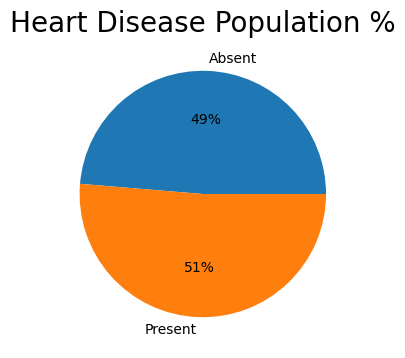

In [93]:
#UNIVARIATE ANALYSIS
#Pie Chart for Heart Disease Population % using MatplotLib

plt.figure(figsize=(6,4))
plt.pie(heart_sum, labels=['Absent','Present'],autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

From the pie chart we can say that Heart disease is present for 51% of population and the rest 49% they are free of heart disease.

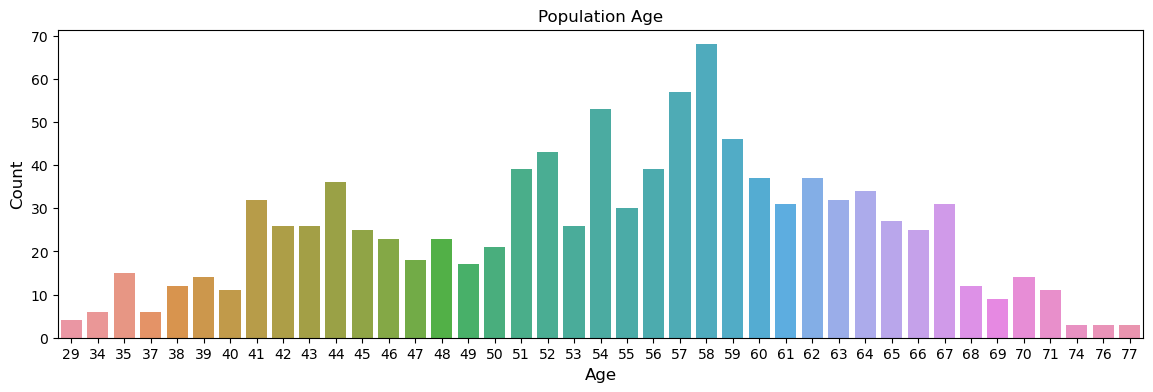

In [31]:
#Countplot Creation of Population Age using MatplotLib and Seaborn

plt.figure(figsize=(14,4))
sns.countplot(x='age', data=heart_data)
plt.title('Population Age', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

From the counterplot we can say that middle aged population from 51-59 years has heart diseases comparatively from the rest of the age categories. It is shown highest for 58 years of age.

In [32]:
#Statistical Analysis

Min_Age=heart_data['age'].min()
Max_Age=heart_data['age'].max()
Avg_Age=heart_data['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Average Age =",Avg_Age)

Minimum Age = 29
Maximum Age = 77
Average Age = 54.43414634146342


In [33]:
#Categorical Analysis

a_group= heart_data[(heart_data['age']>=29) & (heart_data['age']<40)]
b_group= heart_data[(heart_data['age']>=40) & (heart_data['age']<55)]
c_group= heart_data[(heart_data['age']>55)]
print('Young Age =',len(a_group))
print('Middle Age =',len(b_group))
print('Elderly Age =',len(c_group))

Young Age = 57
Middle Age = 419
Elderly Age = 519


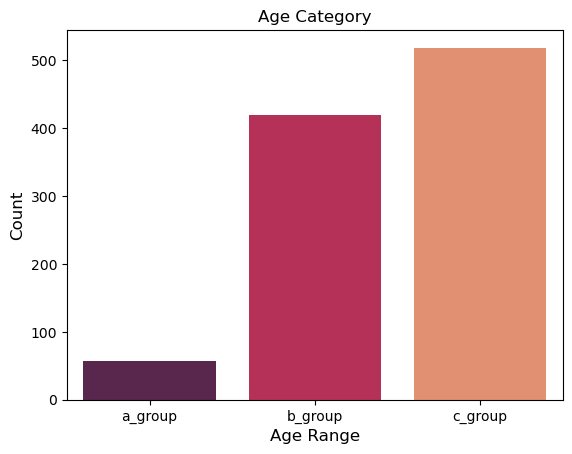

In [35]:
#Bar Plot Creation of Age Category using MatplotLib and Seaborn

sns.barplot(x=['a_group','b_group','c_group'], y=[len(a_group), len(b_group), len(c_group)], palette='rocket')
plt.title('Age Category', fontsize=12)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [36]:
#Converting Numerical Data into Categorical Data

def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [37]:
#Applying converted data into our dataset with new column - Gender

heart_data['Gender']=heart_data['sex'].apply(gender)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,Gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absent,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absent,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absent,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absent,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absent,Female


In [38]:
#Converting Numerical Data into Categorical Data

def age_range(row):
    if row>=29 and row<40:
        return 'Younger'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder'

In [39]:
#Applying converted data into our dataset with new column - Age_C

heart_data['Age_C']=heart_data['age'].apply(age_range)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,Gender,Age_C
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absent,Male,Middle Age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absent,Male,Middle Age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absent,Male,Elder
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absent,Male,Elder
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absent,Female,Elder


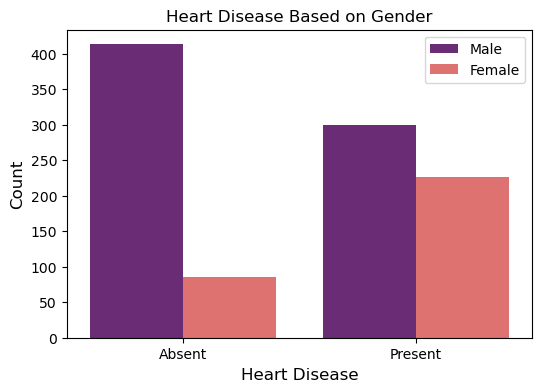

In [48]:
#Count Plot Creation of Heart Disease Based on Gender using MatplotLib and Seaborn

plt.figure(figsize=(6,4))
sns.countplot(x=heart_data['Heart_Disease'], hue='Gender', data=heart_data, palette='magma')
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=12)
plt.show()

From Bar plot it can be noticed that men are having heart disease with the age comparatively to women.

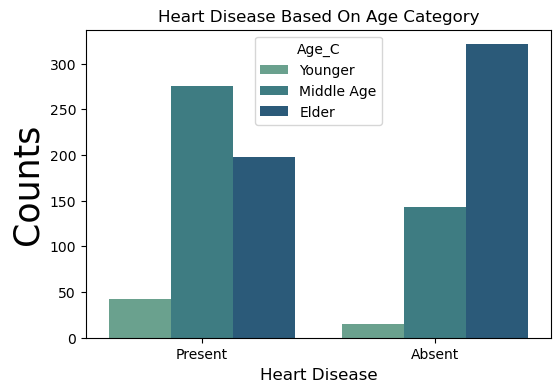

In [49]:
#Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn

plt.figure(figsize=(6,4))
hue_order=['Younger', 'Middle Age', 'Elder']
sns.countplot(x='Heart_Disease', hue='Age_C', data=heart_data, order=['Present','Absent'], hue_order=hue_order, palette='crest')
plt.title('Heart Disease Based On Age Category', fontsize=12)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Counts', fontsize=25)
plt.show()

From graph it is shown that heart disease is mostly in middle age people and absent in the elders 

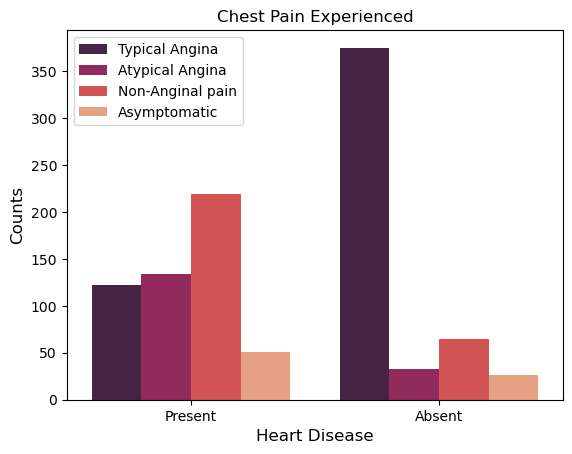

In [51]:
#Count Plot Creation of Chest Pain Experienced using MatplotLib and Seaborn

sns.countplot(x=heart_data['Heart_Disease'], hue='cp', data=heart_data, order=['Present','Absent'],palette='rocket')
plt.title('Chest Pain Experienced', fontsize=12)
plt.xlabel('Heart Disease',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

It is shown that people with Non- Anginal pain are more effected with heart disease and less can be seen in Asymptomatic

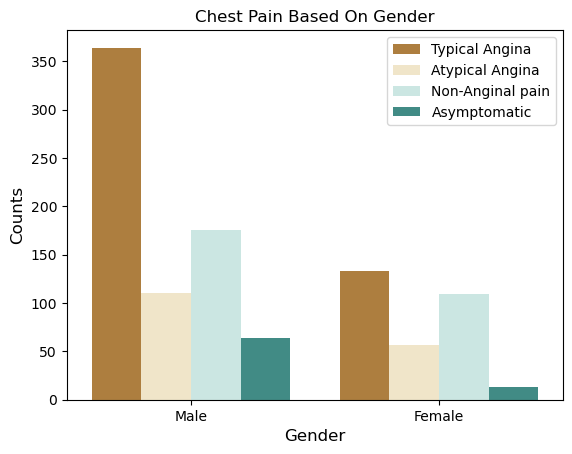

In [57]:
#Count Plot Creation of Chest Pain Based On Gender using MatplotLib and Seaborn

sns.countplot(x=heart_data['Gender'], hue='cp', data=heart_data,palette='BrBG')
plt.title('Chest Pain Based On Gender', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

Here in the above counter plot we can see that Males are more prone to Typical Angina type of pain

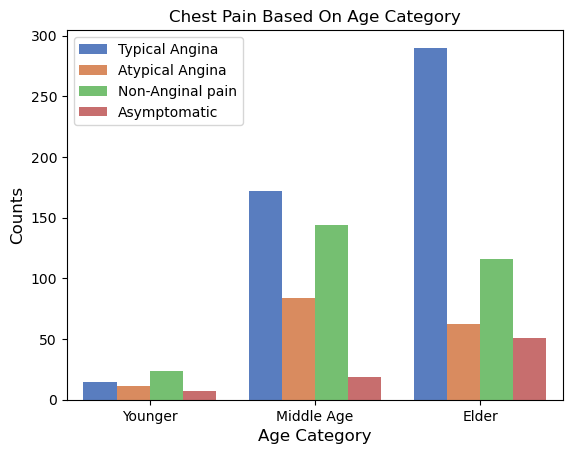

In [58]:
#Count Plot Creation of Chest Pain Based On Age Category using MatplotLib and Seaborn

sns.countplot(x=heart_data['Age_C'], hue='cp', data=heart_data, order=['Younger', 'Middle Age', 'Elder'], palette='muted')
plt.title('Chest Pain Based On Age Category', fontsize=12)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

It is shown in the graph that Elders mostly have Typical Angina pain also the middle age shows Typical Angina pain is more compared to other pains


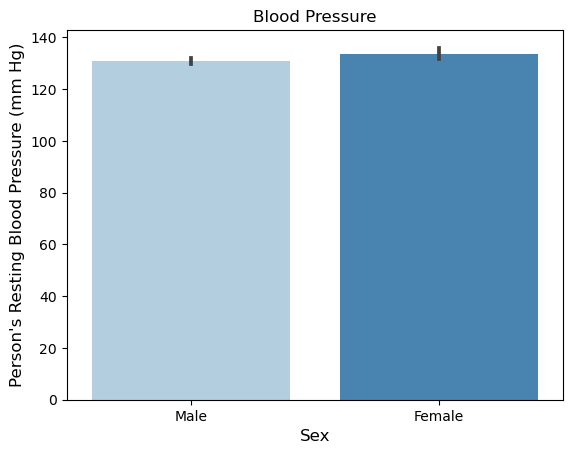

In [64]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) using MatplotLib and Seaborn

sns.barplot(x='Gender', y='trestbps', data=heart_data, palette='Blues')
plt.title("Blood Pressure", fontsize=12)
plt.xlabel('Sex',fontsize=12)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()



Blood pressure is almost equal in males and females yet female is showing a little higher in range

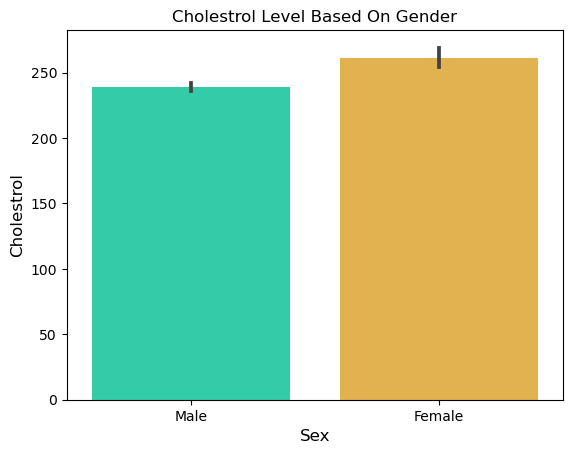

In [70]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn

sns.barplot(x='Gender', y='chol', data=heart_data, palette='turbo')
plt.title("Cholestrol Level Based On Gender", fontsize=12)
plt.xlabel('Sex',fontsize=12)
plt.ylabel("Cholestrol", fontsize=12)
plt.show()

Cholestrol is shown higher in Female than in male

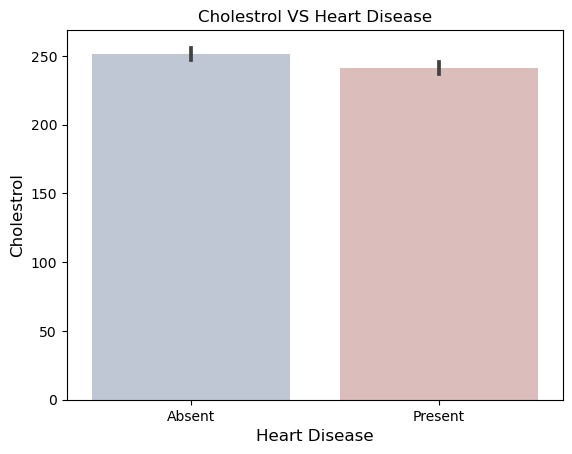

In [71]:
#BIVARIATE ANALYSIS
#Bar Plot Creation of Cholestrol VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='chol', data=heart_data, palette='vlag')
plt.title('Cholestrol VS Heart Disease', fontsize=12)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Cholestrol', fontsize=12)
plt.show()

In graph it shows that cholestrol more than 200 leads to Heart disease

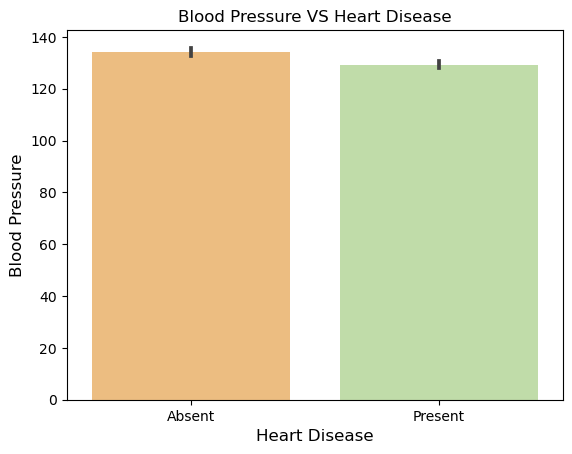

In [74]:
#Bar Plot Creation of Blood Pressure VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='trestbps', data=heart_data, palette='Spectral')
plt.title('Blood Pressure VS Heart Disease', fontsize=12)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Blood Pressure', fontsize=12)
plt.show()

Heart diseases are prent in the people who has blood pressure higher than the normal

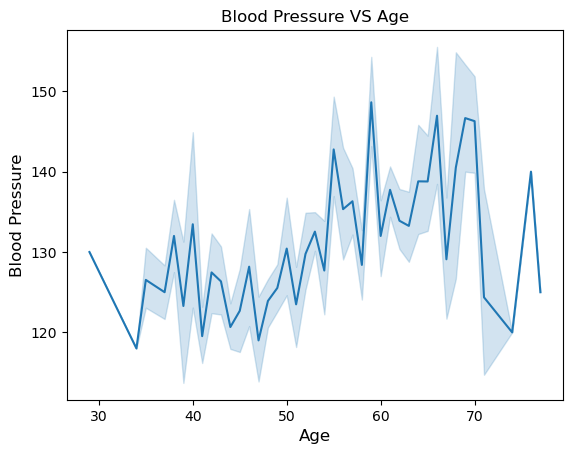

In [81]:
#Line Plot Creation of Blood Pressure VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='trestbps', data=heart_data)
plt.title('Blood Pressure VS Age', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Blood Pressure', fontsize=12)
plt.show()

 Here we can observe that Blood Pressure increases between age of 50 to 60 and somehow continue the pattern till 70

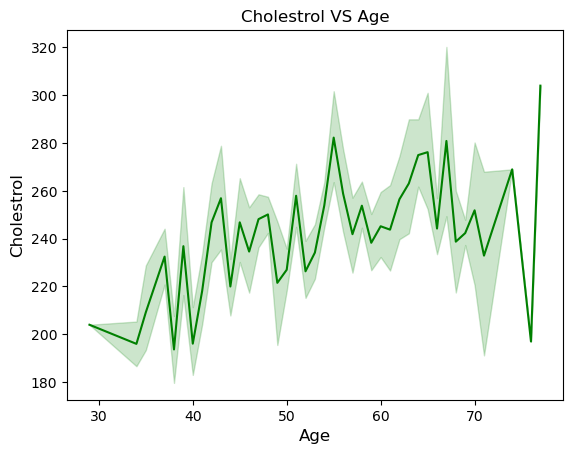

In [82]:
#Line Plot Creation of Cholestrol VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='chol', data=heart_data, color='g')
plt.title('Cholestrol VS Age', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholestrol', fontsize=12)
plt.show()

we can observe that Cholestrol increases between age of 50 to 60 and continues the pattern till 70

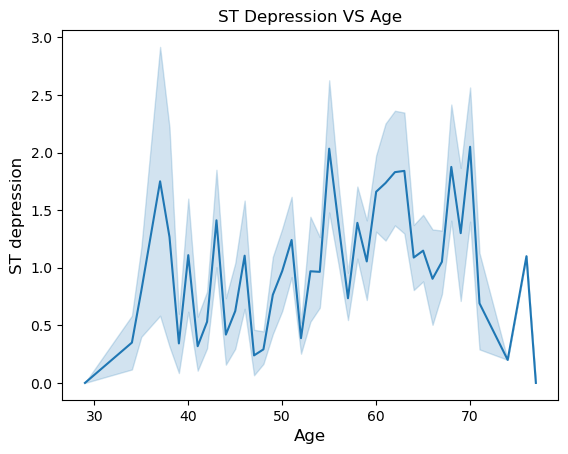

In [85]:
#Line Plot Creation of ST Depression VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='oldpeak', data=heart_data)
plt.title('ST Depression VS Age', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.ylabel('ST depression', fontsize=12)
plt.show()

we can observe from here that ST depression mostly increases between the age group of 30-40
ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.

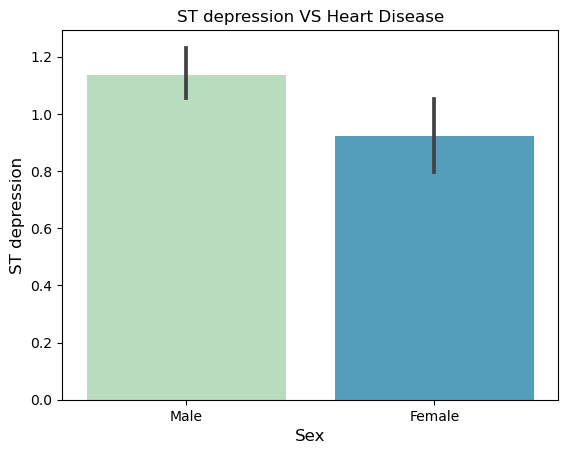

In [86]:
#Bar Plot Creation of ST depression VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Gender', y='oldpeak', data=heart_data, palette='GnBu')
plt.title('ST depression VS Heart Disease', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('ST depression', fontsize=12)
plt.show()

It shows that Males are more into ST depression comparatively to females

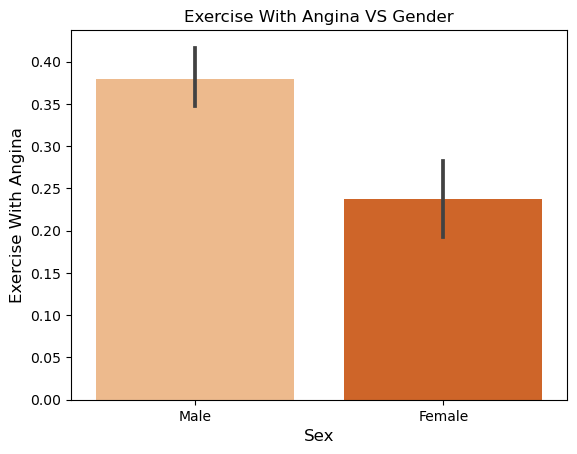

In [87]:
#Bar Plot Creation of Exercise With Angina VS Gender using MatplotLib and Seaborn

sns.barplot(x='Gender', y='exang', data=heart_data, palette='Oranges')
plt.title('Exercise With Angina VS Gender', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Exercise With Angina', fontsize=12)
plt.show()

 Males have have high Exercise Angina. A type of chest pain caused by reduced blood flow to the heart.

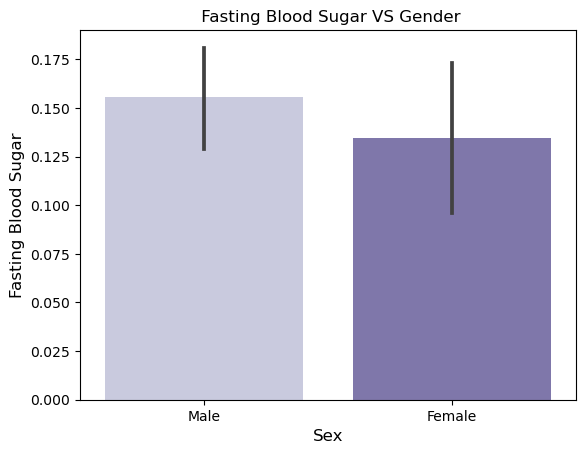

In [88]:
#Bar Plot Creation of Fasting Blood Sugar VS Gender using MatplotLib and Seaborn

sns.barplot(y='fbs', x='Gender', data=heart_data, palette='Purples')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Fasting Blood Sugar', fontsize=12)
plt.show()

 It shows that Males have high no of Fasting Blood Sugar over 120

<AxesSubplot:>

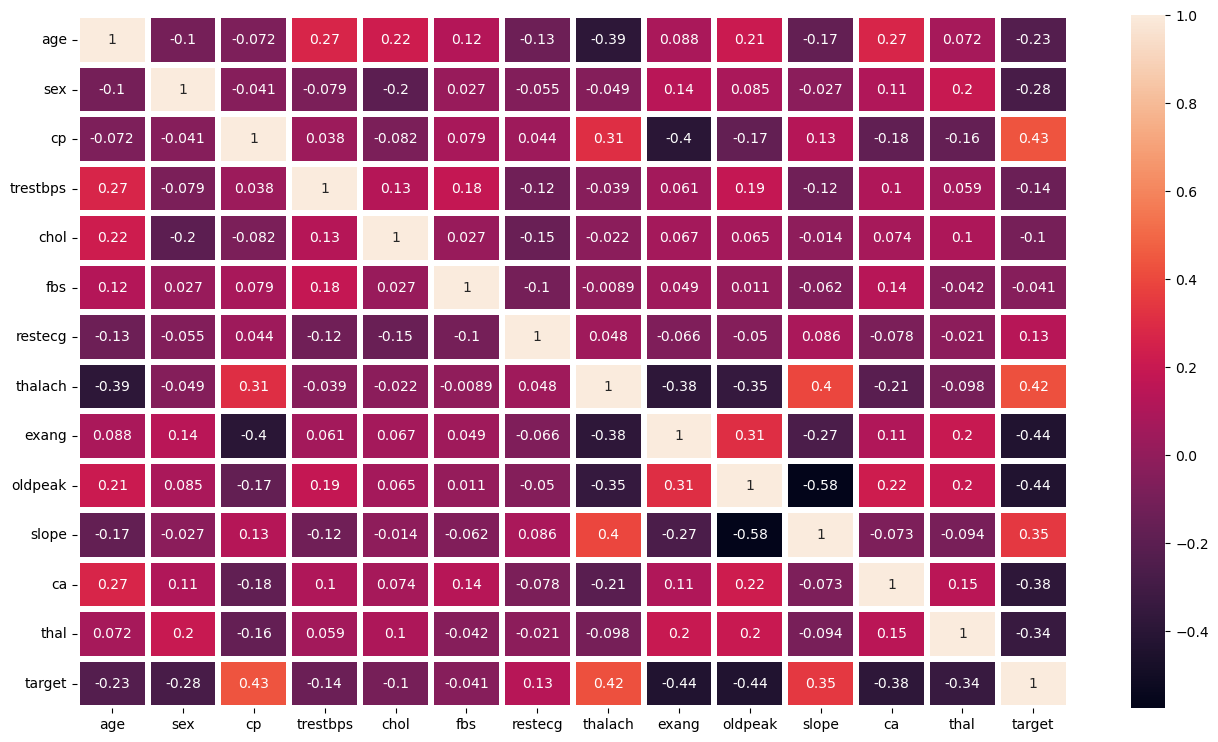

In [92]:
#Heatmap Creation using Seaborn

plt.figure(figsize=(16,9))
sns.heatmap(heart_data.corr(), annot=True, linewidth=3)

## Conclusion 
-51% People suffering from heart disease.

-Elder Aged Men are more (50 to 60 Years) and Females are more in 55 to 65 Years Category

-Males are more prone to heart disease.

-Elderly Aged People are more prone to heart disease.

-People having Typical Angina chest pain have a higher chance of heart disease.

-High number of cholesterol level in people having heart disease.

-Blood Pressure increases between age of 50 to 60 and somehow continue till 70.

-Cholesterol and maximum heart rate Increasing in the age group of 50 60.

-ST depression mostly increases between the age group of 30 40.